# 🦉 Introduction to Exploratory Data Analysis (EDA) and RDKit in Chemoinformatics

## Exploratory Data Analysis (EDA)
Exploratory Data Analysis (EDA) is a crucial first step in any data science workflow. It involves summarizing, visualizing, and understanding data before applying complex models or statistical analyses. The common steps to perform an EDA are:
1. Data Cleaning
2. Data Preprocessing
3. Data Insights
4. Visualization
5. Report

In chemoinformatics, EDA helps identify patterns, trends, and potential issues in molecular datasets, such as missing values, skewed distributions, or correlations between chemical properties. Common EDA techniques include:

*  Descriptive Statistics: Summarizing data with means, medians, standard deviations, and percentiles.
* Visualization: Using histograms, scatterplots, and boxplots to explore relationships and distributions.
* Correlation Analysis: Identifying dependencies between molecular descriptors.
* Principal Component Analysis (PCA): Reducing dimensionality to uncover key structural variations.

## RDKit for Molecular Descriptor Calculation
RDKit is an open-source toolkit widely used for cheminformatics and molecular modeling. **If you are already familiar with python**, I invite you to read the RDKit documentation [Getting Started with the RDKit in Python](https://www.rdkit.org/docs/GettingStartedInPython.html#getting-started-with-the-rdkit-in-python)

One of its key features is the ability to compute molecular descriptors, which are numerical values representing chemical properties. These descriptors serve as essential features in predictive modeling, quantitative structure-activity relationship (QSAR), and quantitative structure-property (QSPR) studies. RDKit provides:

- [2D Descriptors](https://www.rdkit.org/docs/GettingStartedInPython.html#list-of-available-descriptors): Physicochemical properties like molecular weight, logP, and topological polar surface area (TPSA).
- [3D Descriptors](https://www.rdkit.org/docs/GettingStartedInPython.html#list-of-available-3d-descriptors): Conformational-dependent properties like molecular volume.
- [Fingerprints](https://www.rdkit.org/docs/GettingStartedInPython.html#fingerprinting-and-molecular-similarity): Binary representations of molecular substructures for similarity comparisons.

In this notebook, **we will perform EDA on a chemical dataset** and demonstrate how to compute **2D molecular descriptors using RDKit**, preparing the data for further machine learning applications.

## 📝 👀 Take a moment to read the notes in between code lines!


## ⚠️ Some output cells have been cleared to reduce memory usage and facilitate pushing to GitHub.



---



# Mount Drive

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Modules

In [2]:
# Import general packages. Google Colab includes several pre-installed Python packages by default. You can view the complete list by running !pip list -v in a new cell.

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

# Show all the columns of the dataframe
pd.set_option('display.max_columns', None)

# Packages

In [ ]:
#Let's install the additional packages we'll be using in this tutorial that are not pre-installed.
!pip install rdkit #208 descriptores molecules

In [ ]:
!pip install mordred # 1.8k descriptores

# Data

In this section. We will load the dataset on which we will perform our EDA.

In [32]:
# Path to dataset
file_path = '/content/drive/Shared drives/your_path_to_the_CSD_EES_DB_sample.csv' # You shall change the path according to your drive folders

In [ ]:
# Read the CSV file into a DataFrame
data = pd.read_csv(file_path)
data.head()

In [ ]:
# Use the info() function to provide a concise summary of a DataFrame 'data'. The info() functions provides the following:
# The number of entries (rows).
# The number of columns.
# The names of the columns.
# The data type of each column (e.g., int64, float64, object).
# The number of non-null (non-missing) values in each column.
# The memory usage of the DataFrame.
data.info()

In [ ]:
# Some examples of Dtypes:
# float: 3.67
# int: 2,4,80
# object es algo que no es numerico. It can store strings (text), dates, or other types that don't fit into more specific categories like integers or floats.

# 📌 Data Cleaning

In this section, we will identify and rectify issues in the dataset before performing analysis. It helps ensure the quality and reliability of the data. ✨

Some common tasks in data cleaning include:

- Handling missing values.
- Removing duplicates: Identifying and removing redundant rows to prevent skewing results.
- Fixing inconsistencies: Correcting errors like inconsistent formatting, typos, or discrepancies (e.g., "yes" vs. "Yes").
- Filtering out outliers: Detecting and deciding how to treat extreme values that may distort analysis.
- Converting data types: Ensuring that columns have the correct data types (e.g., dates as datetime, numbers as int or float).
- Normalizing or scaling: Adjusting numerical data to a standard range or distribution for comparison.

In [35]:
# Check if we have repeated molecules. Use the function duplicated() but make sure to understand how the duplicates are being counted.

# Example:
# duplicated() (default) counts duplicates excluding the first occurrence.
# duplicated(keep=False) counts all entries in duplicate groups, including the first

data.SMILES.duplicated().sum(), data.SMILES.duplicated(keep=False).sum()

(55, 95)

In [36]:
# Check if there are nan(s) in data
data.isna().sum()

,0
Unnamed: 0,0
ID,0
doi,2004
formula,4
NAts,4
SMILES,5
HOMO,0
LUMO,0
E(S1),0
f(S1),0


In [37]:
# Remove rows where we don't have SMILES
data = data.dropna(subset=['SMILES'])
data.isna().sum()

,0
Unnamed: 0,0
ID,0
doi,2000
formula,0
NAts,0
SMILES,0
HOMO,0
LUMO,0
E(S1),0
f(S1),0


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19995 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  19995 non-null  int64  
 1   ID          19995 non-null  object 
 2   doi         17995 non-null  object 
 3   formula     19995 non-null  object 
 4   NAts        19995 non-null  float64
 5   SMILES      19995 non-null  object 
 6   HOMO        19995 non-null  float64
 7   LUMO        19995 non-null  float64
 8   E(S1)       19995 non-null  float64
 9   f(S1)       19995 non-null  float64
 10  E(S2)       19995 non-null  float64
 11  f(S2)       19995 non-null  float64
 12  E(S3)       19995 non-null  float64
 13  f(S3)       19995 non-null  float64
 14  E(T1)       19995 non-null  float64
 15  E(T2)       19995 non-null  float64
 16  E(T3)       19995 non-null  float64
dtypes: float64(12), int64(1), object(4)
memory usage: 2.7+ MB


In [39]:
# Check if all columns have a name
data.columns

Index(['Unnamed: 0', 'ID', 'doi', 'formula', 'NAts', 'SMILES', 'HOMO', 'LUMO',
       'E(S1)', 'f(S1)', 'E(S2)', 'f(S2)', 'E(S3)', 'f(S3)', 'E(T1)', 'E(T2)',
       'E(T3)'],
      dtype='object')

In [40]:
# Make a list of the columns to use later
columns_ls = data.columns.tolist()
columns_ls

['Unnamed: 0',
 'ID',
 'doi',
 'formula',
 'NAts',
 'SMILES',
 'HOMO',
 'LUMO',
 'E(S1)',
 'f(S1)',
 'E(S2)',
 'f(S2)',
 'E(S3)',
 'f(S3)',
 'E(T1)',
 'E(T2)',
 'E(T3)']

In [41]:
# Check data shape
data.shape # It returns the number of rows, columns

(19995, 17)

# 📌 Data Insights 1/2

## Check the distribution of features and target variables

- The target variable refers to the column *y* (the variable that we aim to predict). This is the dependent variable.
- The features (*X*) are the variables that "describe" our *y*. They are the independent variables.

In [42]:
# Ejemplo para una columna
col_selected = 'HOMO'

In [43]:
# Check the distribution of the column 'HOMO'
data[col_selected].describe()

,HOMO
count,19995.000000
mean,-6.973971
std,0.662866
min,-10.650536
25%,-7.371292
50%,-6.942169
75%,-6.560529
max,-1.508871


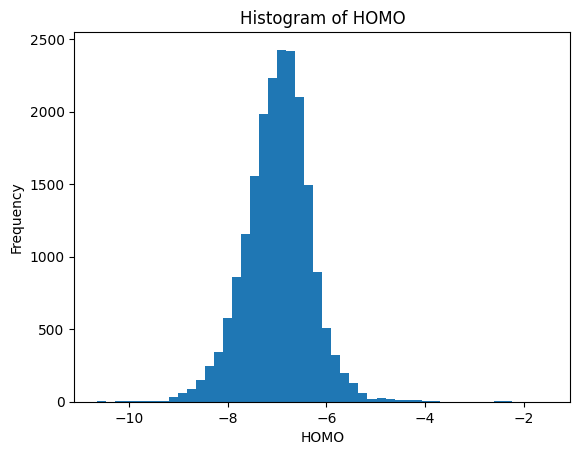

In [44]:
# Make a histrogram for the col_selected

plt.hist(data[col_selected], bins=50)
plt.title(f'Histogram of {col_selected}')
plt.xlabel(col_selected)
plt.ylabel('Frequency')
plt.show()

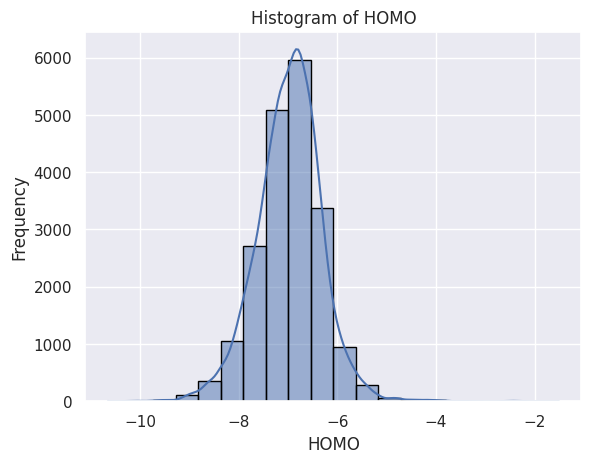

In [47]:
# Use seaborn to set the style
# Use matlotlib to plot histograms

# Set a style
sns.set(style="darkgrid", context="notebook")

# Make plot
sns.histplot(data[col_selected], kde=True, edgecolor='black', bins=20)
plt.title(f'Histogram of {col_selected}')
plt.xlabel(col_selected)
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Plot histograms for all the columns
# Create histograms for all numeric columns
for column in data.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(8, 6))
    plt.hist(data[column].dropna(), color='lightblue', edgecolor='blue')  # Adjust bins as needed
    plt.title(f'Histogram for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

## Try with different type of plots - Check outliers


👀 We can also investigate the presence of outliers. The boxplot is a type of plot useful to check the detect outliers.

Text(0.5, 1.0, 'Boxplot of HOMO')

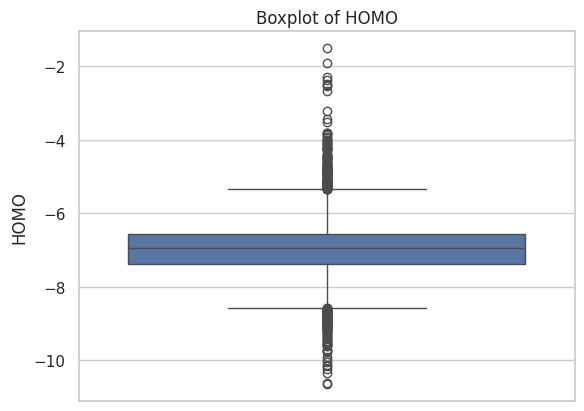

In [49]:
# Boxplot
sns.set(style="whitegrid", context="notebook")

# Make plot
sns.boxplot(data[col_selected])
plt.title(f'Boxplot of {col_selected}')


🎻  Violin plots are used when you want to observe the distribution of numeric data, and are especially useful when you want to make a comparison of distributions between multiple groups.

Text(0.5, 1.0, 'Violin plot of HOMO')

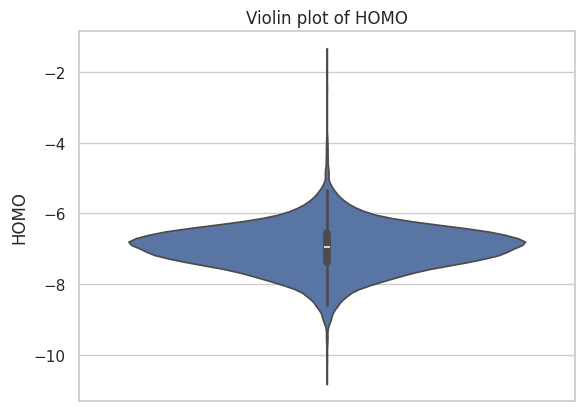

In [50]:
# Violin plot
sns.set(style="whitegrid", context="notebook")

# Make plot
sns.violinplot(data[col_selected])
plt.title(f'Violin plot of {col_selected}')

📝 Swarm plots are useful to visualize the distribution of points within categories. We can identify patterns or outliers in the data with violin plots.
But also, these plots can complement other plots like box plots or violin plots by showing individual data points.

In [ ]:
# Takes too long!!! The dataset is quite big (about 20k molecules)
# Swarm plots can become very slow when dealing with large datasets because they attempt to arrange points to avoid overlap.

# # Make plot
# sns.swarmplot(data[col_selected])
# plt.title(f'Swarm plot of {col_selected}')

## Another tool for plots: Plotly

📝 Plotly is a Python library that enables the creation of interactive plots. For example, when hovering over histograms, we can see the bin values corresponding to the mouse position.

In [52]:
# install plotly
!pip install plotly

In [ ]:
# Make a histrogram with Plotly
import plotly.express as px

fig = px.histogram(data, x=col_selected, nbins=50)
fig.show()

👌🏽 There are many libraries for data visualization. You can also test Bokeh, Altair, etc.

## Working with the SMILES strings

In [ ]:
# Save the smiles in a list
smiles_list = data['SMILES'].tolist()
print(len(smiles_list))
smiles_list

In [ ]:
# Draw the molecules

from rdkit import Chem
from rdkit.Chem import Draw

# Create molecule objects
mols = [Chem.MolFromSmiles(smi) for smi in smiles_list]

# Generate the grid image
img = Draw.MolsToGridImage(
    mols,
    molsPerRow=3,
    subImgSize=(400, 150),
    legends=smiles_list,
    useSVG=True, # Use SVG rendering
    maxMols=500 # We only draw 500 mols, otherwise, we can crash the notebook
)
# Display the SVG
display(img)

In [ ]:
# Draw molecules applying a sanitization preprocess to avoid the warnings such as "Explicit valence for atom # 10 B, 4, is greater than permitted"

from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.MolStandardize import rdMolStandardize

mols = []
valid_smiles = []   # List to store valid SMILES
invalid_smiles = [] # List to store invalid SMILES

# Sanitization
for smi in smiles_list:
    try:
        # First, standardize the SMILES
        standardized_smi = rdMolStandardize.StandardizeSmiles(smi)

        # Convert the standardized SMILES to an RDKit Mol object
        mol = Chem.MolFromSmiles(standardized_smi)

        if mol is not None:
            try:
                # Attempt to sanitize the molecule
                Chem.SanitizeMol(mol)
                mols.append(mol)
                valid_smiles.append(standardized_smi)  # Store valid SMILES
            except Exception as e:
                print(f"Sanitization failed for SMILES: {smi} -> {e}")
                invalid_smiles.append(smi)  # Log invalid SMILES
        else:
            print(f"Invalid SMILES (Mol conversion failed): {smi}")
            invalid_smiles.append(smi)  # Log invalid SMILES
    except Exception as e:
        print(f"Error processing SMILES '{smi}': {e}")
        invalid_smiles.append(smi)  # Log invalid SMILES

# # Draw ONLY THE valid molecules
if mols:
    # Generate the grid image
    img = Draw.MolsToGridImage(
        mols,
        molsPerRow=3,
        subImgSize=(400, 150),
        legends=valid_smiles,
        useSVG=True, # Use SVG rendering
        maxMols=500 # We only draw 500 mols, otherwise, we can crash the notebook
    )
    # Display the SVG
    display(img)
else:
    print("No valid molecules to draw.")

In [ ]:
# Save or print invalid SMILES
if invalid_smiles:
    print(f"Number of invalid SMILES: {len(invalid_smiles)}")
    print("Invalid SMILES:")
    for invalid in invalid_smiles:
        print(invalid)

In [ ]:
# Optional: Save invalid SMILES to a file (we can investigate later what it is wrong with them)
dir_path = 'your_dir_path'

with open(f"{dir_path}invalid_smiles_of_CSD_EES_DB.txt", "w") as f:
    for invalid in invalid_smiles:
        f.write(invalid + "\n")

In [58]:
# Compare how many valid and invalid smiles we have
print(f'Total of valid smiles in the dataset {len(valid_smiles)}')
print(f'Total of INvalid smiles in the dataset {len(invalid_smiles)}')

Total of valid smiles in the dataset 19746
Total of INvalid smiles in the dataset 249


In [59]:
# Drop rows where the 'SMILES' column contains any of the lsited invalid SMILES
data = data[~data['SMILES'].isin(invalid_smiles)]
len(data) # <-- this is the final total of rows in our dataset after

19746

# 📌 Data Preprocessing

⚙️ In this section, we will focus on preparing the dataset for Machine Learning. Since our models require features that characterize the molecules, we will incorporate RDKit 2D descriptors into the feature set.

The steps to calculate the 2D RDKit descriptors are:
1. Get canonical smiles. Learn why we need to generate canonical smiles [here](https://github.com/PatWalters/practical_cheminformatics_tutorials/blob/7e7528c937e9df112ecb0b00a4ab20ed0a905ca5/fundamentals/SMILES_tutorial.ipynb). In summary: Simplified Molecular Input Line Entry System (SMILES) is a single line text representation of a unique molecule. One molecule can however have multiple SMILES strings, which is a reason that canonical SMILES have been defined, which ensures a one to one correspondence between SMILES string and molecule.
2. Remove duplicates
3. Calculate the descriptors with RDKit
4. Merge the dataframes (our dataset with the descriptors) to generate a single dataframe with all the features.

## Get canonical smiles




In [60]:
# First, we need to ge the canonical SMILES
# There might be one or more valid SMILES that can represent one compound, thus we need to make sure that ONLY ONE SMILES represents ONE valid compound or molecule.
# Thanks to Pat Walters for this information, checkout his excellent blog: https://github.com/PatWalters/practical_cheminformatics_tutorials/blob/7e7528c937e9df112ecb0b00a4ab20ed0a905ca5/fundamentals/SMILES_tutorial.ipynb

from rdkit import Chem
from rdkit.Chem import AllChem


def canonical_smiles(smiles):
    mols = [Chem.MolFromSmiles(smi) for smi in smiles]
    smiles = [Chem.MolToSmiles(mol) for mol in mols]
    return smiles

In [61]:
# Canonical SMILES
Canon_SMILES = canonical_smiles(data.SMILES)
len(Canon_SMILES)

19746

In [62]:
# Put the canonical smiles in the dataframe
data['canon_SMILES'] = Canon_SMILES

In [65]:
# Check your dataset until now
# Display all the rows and columns
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)

In [ ]:
data

In [67]:
# Check if all rows have canon_smiles in data
data.canon_SMILES.isna().sum()

0

## Check for duplicates

In [68]:
# Check if there are duplicate canon smiles, adn create a list for those duplicate smiles
duplicates_smiles = data[data['canon_SMILES'].duplicated()]['canon_SMILES'].values
len(duplicates_smiles)

51

In [ ]:
# Create a df for duplicate smiles
data[data['canon_SMILES'].isin(duplicates_smiles)].sort_values(by=['canon_SMILES'])

In [70]:
# Drop duplicates (if any)
dataset_new = data.drop_duplicates(subset=['canon_SMILES'])
len(dataset_new)

19695

In [71]:
dataset_new.head() # <-- This is our dataset with the canonical smiles

,Unnamed: 0,ID,doi,formula,NAts,SMILES,HOMO,LUMO,E(S1),f(S1),E(S2),f(S2),E(S3),f(S3),E(T1),E(T2),E(T3),canon_SMILES
0,1570,AYESOO,10.1039/C6RA21681A,C48 H40 O4 S8,60.0,O=CC1=CC=C(S1)C1=CC=C(S1)C1=CC=C(S1)C1=Cc2c3OC...,-6.465153,-1.953233,2.9655,3.0067,3.2946,0.0023,3.5275,0.5844,2.0828,2.2173,2.4419,O=Cc1ccc(-c2ccc(-c3ccc(-c4cc5c6c7sc(-c8ccc(-c9...
1,6715,DILWUT,10.1002/slct.201702684,C27 H21 N5 O4 S1,37.0,CCN1c2ccc(C=NNc3ccc(cc3N(=O)=O)N(=O)=O)cc2Sc2c...,-6.557944,-1.811190,3.2872,0.7446,3.7220,0.0232,3.7705,0.0028,2.2932,2.5188,2.6485,CCN1c2ccc(C=NNc3ccc([N+](=O)[O-])cc3[N+](=O)[O...
2,15618,IFUKID,10.1002/1521-3765(20020617)8:12<2705::AID-CHEM...,C18 H16 O4 P2 Se3,27.0,COC(=O)C1=C(C(=O)OC)P(=[Se])([Se]P1(=[Se])c1cc...,-7.159043,-1.585335,3.3755,0.0037,3.5095,0.0135,3.7515,0.0028,3.1431,3.2213,3.3298,COC(=O)C1=C(C(=O)OC)P(=[Se])(c2ccccc2)[Se]P1(=...
3,2740,BIVBAL,10.1002/ejoc.201301227,C15 H15 N1 O3 S2,21.0,CCSC(SCC)=C1C(=O)N(C(=O)C1=O)c1ccccc1,-7.820008,-1.768740,2.9209,0.0081,3.8728,0.3395,4.3360,0.0506,2.4292,2.6233,3.5475,CCSC(SCC)=C1C(=O)C(=O)N(c2ccccc2)C1=O
4,22016,LUDPIK,10.1039/b907641g,C12 H14 Cl1 O4 P1 Se1,19.0,CC1(C)COP(=[Se])(OC1)OC(=O)c1ccc(Cl)cc1,-7.306529,-1.091993,4.4020,0.0147,4.5567,0.0219,5.0167,0.0138,3.8529,4.2618,4.4623,CC1(C)COP(=[Se])(OC(=O)c2ccc(Cl)cc2)OC1


In [ ]:
# Optional
# Save latest version of the dataset
dataset_new.to_csv(f'{dir_path}CSD_EES_DB_with_canon_smiles.csv', index=True)

In [ ]:
# Optional
# Save duplicates in a csv file
df_duplicate_smiles=data[data['canon_SMILES'].isin(duplicates_smiles)].sort_values(by=['canon_SMILES'])
df_duplicate_smiles.to_csv(f'{dir_path}duplicates_smiles_in_CSD_EES_DB.csv', index=True)

## Get the RDKit descriptors

In [73]:
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors.MoleculeDescriptors import MolecularDescriptorCalculator

def RDkit_descriptors(smiles): # The canonical smiles
    # Initialize the descriptor calculator
    calc = MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])
    desc_names = calc.GetDescriptorNames()

    Mol_descriptors = []
    for smi in smiles:
        try:
            # Create RDKit molecule object and validate it
            mol = Chem.MolFromSmiles(smi)
            if mol is None:
                raise ValueError(f"Invalid SMILES: {smi}")

            # Add hydrogens to the molecule
            mol = Chem.AddHs(mol)

            # Calculate all descriptors
            descriptors = calc.CalcDescriptors(mol)
            Mol_descriptors.append(descriptors)
        except Exception as e:
            print(f"Error processing SMILES '{smi}': {e}")
            Mol_descriptors.append([None] * len(desc_names))  # Append placeholders for invalid SMILES

    return Mol_descriptors, desc_names

In [74]:
# Function call
Mol_descriptors, desc_names = RDkit_descriptors(dataset_new['canon_SMILES'])

In [ ]:
# Save the descriptors in a new dataframe
df_with_200_descriptors = pd.DataFrame(Mol_descriptors,columns=desc_names)
print(len(df_with_200_descriptors))
df_with_200_descriptors.head()

In [76]:
# Add ID's to df_with_200_descriptors
ID_list= dataset_new['ID']
df_with_200_descriptors.insert(0, 'ID', ID_list)
print(len(df_with_200_descriptors))
df_with_200_descriptors.head()

19695


,ID,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,BCUT2D_MWHI,BCUT2D_MWLOW,BCUT2D_CHGHI,BCUT2D_CHGLO,BCUT2D_LOGPHI,BCUT2D_LOGPLOW,BCUT2D_MRHI,BCUT2D_MRLOW,AvgIpc,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3n,Chi3v,Chi4n,Chi4v,HallKierAlpha,Ipc,Kappa1,Kappa2,Kappa3,LabuteASA,PEOE_VSA1,PEOE_VSA10,PEOE_VSA11,PEOE_VSA12,PEOE_VSA13,PEOE_VSA14,PEOE_VSA2,PEOE_VSA3,PEOE_VSA4,PEOE_VSA5,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,PEOE_VSA9,SMR_VSA1,SMR_VSA10,SMR_VSA2,SMR_VSA3,SMR_VSA4,SMR_VSA5,SMR_VSA6,SMR_VSA7,SMR_VSA8,SMR_VSA9,SlogP_VSA1,SlogP_VSA10,SlogP_VSA11,SlogP_VSA12,SlogP_VSA2,SlogP_VSA3,SlogP_VSA4,SlogP_VSA5,SlogP_VSA6,SlogP_VSA7,SlogP_VSA8,SlogP_VSA9,TPSA,EState_VSA1,EState_VSA10,EState_VSA11,EState_VSA2,EState_VSA3,EState_VSA4,EState_VSA5,EState_VSA6,EState_VSA7,EState_VSA8,EState_VSA9,VSA_EState1,VSA_EState10,VSA_EState2,VSA_EState3,VSA_EState4,VSA_EState5,VSA_EState6,VSA_EState7,VSA_EState8,VSA_EState9,FractionCSP3,HeavyAtomCount,NHOHCount,NOCount,NumAliphaticCarbocycles,NumAliphaticHeterocycles,NumAliphaticRings,NumAmideBonds,NumAromaticCarbocycles,NumAromaticHeterocycles,NumAromaticRings,NumAtomStereoCenters,NumBridgeheadAtoms,NumHAcceptors,NumHDonors,NumHeteroatoms,NumHeterocycles,NumRotatableBonds,NumSaturatedCarbocycles,NumSaturatedHeterocycles,NumSaturatedRings,NumSpiroAtoms,NumUnspecifiedAtomStereoCenters,Phi,RingCount,MolLogP,MolMR,fr_Al_COO,fr_Al_OH,fr_Al_OH_noTert,fr_ArN,fr_Ar_COO,fr_Ar_N,fr_Ar_NH,fr_Ar_OH,fr_COO,fr_COO2,fr_C_O,fr_C_O_noCOO,fr_C_S,fr_HOCCN,fr_Imine,fr_NH0,fr_NH1,fr_NH2,fr_N_O,fr_Ndealkylation1,fr_Ndealkylation2,fr_Nhpyrrole,fr_SH,fr_aldehyde,fr_alkyl_carbamate,fr_alkyl_halide,fr_allylic_oxid,fr_amide,fr_amidine,fr_aniline,fr_aryl_methyl,fr_azide,fr_azo,fr_barbitur,fr_benzene,fr_benzodiazepine,fr_bicyclic,fr_diazo,fr_dihydropyridine,fr_epoxide,fr_ester,fr_ether,fr_furan,fr_guanido,fr_halogen,fr_hdrzine,fr_hdrzone,fr_imidazole,fr_imide,fr_isocyan,fr_isothiocyan,fr_ketone,fr_ketone_Topliss,fr_lactam,fr_lactone,fr_methoxy,fr_morpholine,fr_nitrile,fr_nitro,fr_nitro_arom,fr_nitro_arom_nonortho,fr_nitroso,fr_oxazole,fr_oxime,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond,fr_phos_acid,fr_phos_ester,fr_piperdine,fr_piperzine,fr_priamide,fr_prisulfonamd,fr_pyridine,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,AYESOO,12.065739,12.065739,0.134070,-5.120649,0.142482,34.333333,937.380,897.060,936.069228,304,0,0.159517,-0.491396,0.491396,0.159517,0.400000,0.683333,1.000000,32.144371,10.063813,2.242200,-2.138549,2.544470,-2.007105,7.311839,0.111402,0.857240,1.332017,4663.641140,75.855678,68.898979,35.430952,45.197881,36.240731,22.772704,11.103104,19.268069,7.561650,16.426956,5.143091,12.579528,-3.720000,8.304542e+27,15.516666,18.323506,8.419787,437.112517,9.473726,14.240541,12.524424,0.0,0.000000,0.000000,9.589074,0.00000,0.000000,90.694287,50.983399,97.339712,96.713386,56.945759,73.893143,123.391000,0.0,0.0,0.000000,63.729249,13.117970,94.348156,0.0,70.024790,9.473726,0.000000,11.499024,90.694287,25.642395,0.000000,0.000000,137.902960,84.593862,0.000000,78.698055,0.0,52.60,234.899701,23.296660,0.0,61.690749,68.020715,0.0,0.0,0.0,0.000000,0.000000,50.596483,366.305572,3.189406,18.777355,-2.071073,0.000000,-2.618276,-10.558697,-53.058303,-9.299317,0.000000,0.250000,60,0,4,0,1,1,0,1,8,9,0,2,12,0,12,9,8,0,0,0,0,0,4.738662,10,17.7842,265.0210,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,3,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,0
1,DILWUT,11.871897,11.871897,0.183742,-3.684492,0.157978,21.243243,511.563,490.395,511.131425,184,0,0.300543,-0.339923,0.339923,0.300543,1.027027,1.783784,2.513514,32.166582,10.047

In [77]:
# Put together the df_with_200_descriptors and the dataset_new dataframes so we can have the descriptors on the same table as in the dataset
# Merge df_with_200_descriptors with dataset_new based on the ID
merged_df = pd.merge(dataset_new, df_with_200_descriptors, on='ID', how='left')
print(len(merged_df))
merged_df.head() # <-- This is the dataset with all the columns (including descriptors)

19695


,Unnamed: 0,ID,doi,formula,NAts,SMILES,HOMO,LUMO,E(S1),f(S1),E(S2),f(S2),E(S3),f(S3),E(T1),E(T2),E(T3),canon_SMILES,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,BCUT2D_MWHI,BCUT2D_MWLOW,BCUT2D_CHGHI,BCUT2D_CHGLO,BCUT2D_LOGPHI,BCUT2D_LOGPLOW,BCUT2D_MRHI,BCUT2D_MRLOW,AvgIpc,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3n,Chi3v,Chi4n,Chi4v,HallKierAlpha,Ipc,Kappa1,Kappa2,Kappa3,LabuteASA,PEOE_VSA1,PEOE_VSA10,PEOE_VSA11,PEOE_VSA12,PEOE_VSA13,PEOE_VSA14,PEOE_VSA2,PEOE_VSA3,PEOE_VSA4,PEOE_VSA5,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,PEOE_VSA9,SMR_VSA1,SMR_VSA10,SMR_VSA2,SMR_VSA3,SMR_VSA4,SMR_VSA5,SMR_VSA6,SMR_VSA7,SMR_VSA8,SMR_VSA9,SlogP_VSA1,SlogP_VSA10,SlogP_VSA11,SlogP_VSA12,SlogP_VSA2,SlogP_VSA3,SlogP_VSA4,SlogP_VSA5,SlogP_VSA6,SlogP_VSA7,SlogP_VSA8,SlogP_VSA9,TPSA,EState_VSA1,EState_VSA10,EState_VSA11,EState_VSA2,EState_VSA3,EState_VSA4,EState_VSA5,EState_VSA6,EState_VSA7,EState_VSA8,EState_VSA9,VSA_EState1,VSA_EState10,VSA_EState2,VSA_EState3,VSA_EState4,VSA_EState5,VSA_EState6,VSA_EState7,VSA_EState8,VSA_EState9,FractionCSP3,HeavyAtomCount,NHOHCount,NOCount,NumAliphaticCarbocycles,NumAliphaticHeterocycles,NumAliphaticRings,NumAmideBonds,NumAromaticCarbocycles,NumAromaticHeterocycles,NumAromaticRings,NumAtomStereoCenters,NumBridgeheadAtoms,NumHAcceptors,NumHDonors,NumHeteroatoms,NumHeterocycles,NumRotatableBonds,NumSaturatedCarbocycles,NumSaturatedHeterocycles,NumSaturatedRings,NumSpiroAtoms,NumUnspecifiedAtomStereoCenters,Phi,RingCount,MolLogP,MolMR,fr_Al_COO,fr_Al_OH,fr_Al_OH_noTert,fr_ArN,fr_Ar_COO,fr_Ar_N,fr_Ar_NH,fr_Ar_OH,fr_COO,fr_COO2,fr_C_O,fr_C_O_noCOO,fr_C_S,fr_HOCCN,fr_Imine,fr_NH0,fr_NH1,fr_NH2,fr_N_O,fr_Ndealkylation1,fr_Ndealkylation2,fr_Nhpyrrole,fr_SH,fr_aldehyde,fr_alkyl_carbamate,fr_alkyl_halide,fr_allylic_oxid,fr_amide,fr_amidine,fr_aniline,fr_aryl_methyl,fr_azide,fr_azo,fr_barbitur,fr_benzene,fr_benzodiazepine,fr_bicyclic,fr_diazo,fr_dihydropyridine,fr_epoxide,fr_ester,fr_ether,fr_furan,fr_guanido,fr_halogen,fr_hdrzine,fr_hdrzone,fr_imidazole,fr_imide,fr_isocyan,fr_isothiocyan,fr_ketone,fr_ketone_Topliss,fr_lactam,fr_lactone,fr_methoxy,fr_morpholine,fr_nitrile,fr_nitro,fr_nitro_arom,fr_nitro_arom_nonortho,fr_nitroso,fr_oxazole,fr_oxime,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond,fr_phos_acid,fr_phos_ester,fr_piperdine,fr_piperzine,fr_priamide,fr_prisulfonamd,fr_pyridine,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,1570,AYESOO,10.1039/C6RA21681A,C48 H40 O4 S8,60.0,O=CC1=CC=C(S1)C1=CC=C(S1)C1=CC=C(S1)C1=Cc2c3OC...,-6.465153,-1.953233,2.9655,3.0067,3.2946,0.0023,3.5275,0.5844,2.0828,2.2173,2.4419,O=Cc1ccc(-c2ccc(-c3ccc(-c4cc5c6c7sc(-c8ccc(-c9...,12.065739,12.065739,0.134070,-5.120649,0.142482,34.333333,937.380,897.060,936.069228,304.0,0.0,0.159517,-0.491396,0.491396,0.159517,0.400000,0.683333,1.000000,32.144371,10.063813,2.242200,-2.138549,2.544470,-2.007105,7.311839,0.111402,0.857240,1.332017,4663.641140,75.855678,68.898979,35.430952,45.197881,36.240731,22.772704,11.103104,19.268069,7.561650,16.426956,5.143091,12.579528,-3.720000,8.304542e+27,15.516666,18.323506,8.419787,437.112517,9.473726,14.240541,12.524424,0.0,0.000000,0.000000,9.589074,0.00000,0.000000,90.694287,50.983399,97.339712,96.713386,56.945759,73.893143,123.391000,0.0,0.0,0.000000,63.729249,13.117970,94.348156,0.0,70.024790,9.473726,0.000000,11.499024,90.694287,25.642395,0.000000,0.000000,137.902960,84.593862,0.000000,78.698055,0.0,52.60,234.899701,23.296660,0.0,61.690749,68.020715,0.0,0.0,0.0,0.000000,0.000000,50.596483,366.305572,3.189406,18.777355,-2.071073,0.000000,-2.618276,-10.558697,-53.058303,-9.299317,0.000000,0.250000,60.0,0.0,4.0,0.0,1.0,1.0,0.0,1.0,8.0,9.0,0.0,2.0,12.0,0.0,12.0,9.0,8.0,0.0,0.0,0.0,0

In [ ]:
# Optional
# Save merged df
merged_df.to_csv(f'{dir_path}CSD_EES_DB_with_200_descriptors.csv', index=True)

# 📌 Data Insights 2/2

## Correlation analysis

👀 Spotting highly correlated features is crucial for several reasons:
1. **Reduce Redundant Information**: Features that are highly correlated often carry redundant information. Removing one of them can:

  * Simplify the model.
  * Improve computational efficiency.
  * Reduce overfitting.

2. **Improve Model Generalization**: Models trained on highly correlated features might memorize noise rather than learning true patterns, leading to poor generalization on unseen data.

3. **Better Understanding of Data Relationships**: Spotting correlations allows you to understand dependencies between variables, which can:

  * Reveal hidden relationships in the data.
  * Help in feature engineering by combining correlated variables into a meaningful new feature.

4. **How to Detect Correlated Features?**
  * Correlation matrix (e.g., Pearson, Spearman, Kendall).
  * Heatmaps for visualizing feature relationships.
  * Variance Inflation Factor (VIF) to detect multicollinearity.
  * Dimensionality reduction techniques (e.g., PCA) to remove redundant features.

--> In this tutorial, we'll conduct a correlation matrix

In [78]:
# Check the columns in the dataset once more
data.columns


Index(['Unnamed: 0', 'ID', 'doi', 'formula', 'NAts', 'SMILES', 'HOMO', 'LUMO',
       'E(S1)', 'f(S1)', 'E(S2)', 'f(S2)', 'E(S3)', 'f(S3)', 'E(T1)', 'E(T2)',
       'E(T3)', 'canon_SMILES'],
      dtype='object')

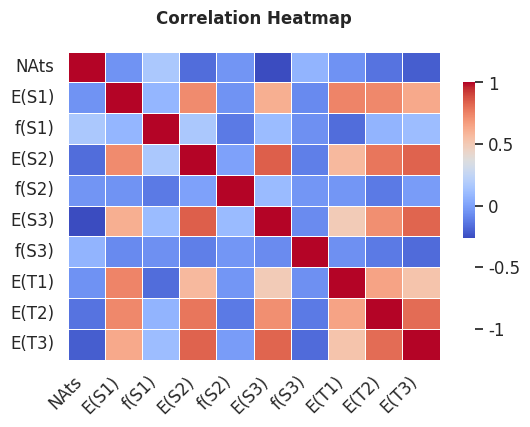

In [79]:
# The correlation among the initial columns
selected_cols = ['NAts','E(S1)', 'f(S1)', 'E(S2)', 'f(S2)', 'E(S3)', 'f(S3)', 'E(T1)', 'E(T2)', 'E(T3)']
corr1 = data[selected_cols].corr()

plt.figure(figsize=(6, 4), dpi=100)
sns.set(style='white')
heatmap = sns.heatmap(corr1, annot=False, fmt='.2f', cmap='coolwarm', linewidths=0.5, linecolor='white', cbar_kws={"shrink": .8})

cbar = heatmap.collections[0].colorbar
cbar.set_ticks([-1, -0.5, 0, 0.5, 1])
cbar.set_ticklabels(['-1', '-0.5', '0', '0.5', '1'])
cbar.ax.tick_params(labelsize=12)

plt.title('Correlation Heatmap', fontsize=12, fontweight='bold', pad=20)
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12, rotation=0)
plt.show()

In [80]:
# Quick check on the columns of the latest version of the dataset
print(list(merged_df.columns))

['Unnamed: 0', 'ID', 'doi', 'formula', 'NAts', 'SMILES', 'HOMO', 'LUMO', 'E(S1)', 'f(S1)', 'E(S2)', 'f(S2)', 'E(S3)', 'f(S3)', 'E(T1)', 'E(T2)', 'E(T3)', 'canon_SMILES', 'MaxAbsEStateIndex', 'MaxEStateIndex', 'MinAbsEStateIndex', 'MinEStateIndex', 'qed', 'SPS', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt', 'NumValenceElectrons', 'NumRadicalElectrons', 'MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW', 'AvgIpc', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'HallKierAlpha', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA

In [81]:
# Extract the numerical columns of merged_df
print(list(merged_df.select_dtypes(include=['number']).columns))
numerical_cols = merged_df.select_dtypes(include=['number']).columns
print(len(numerical_cols))

['Unnamed: 0', 'NAts', 'HOMO', 'LUMO', 'E(S1)', 'f(S1)', 'E(S2)', 'f(S2)', 'E(S3)', 'f(S3)', 'E(T1)', 'E(T2)', 'E(T3)', 'MaxAbsEStateIndex', 'MaxEStateIndex', 'MinAbsEStateIndex', 'MinEStateIndex', 'qed', 'SPS', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt', 'NumValenceElectrons', 'NumRadicalElectrons', 'MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW', 'AvgIpc', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'HallKierAlpha', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA

In [82]:
# Correlation among te numerical columns in merge_df
corr2 = merged_df[numerical_cols].corr()

In [83]:
# Add correlation to a dataframe
corr_merged_df = pd.DataFrame(corr2)
corr_merged_df.head()

,Unnamed: 0,NAts,HOMO,LUMO,E(S1),f(S1),E(S2),f(S2),E(S3),f(S3),E(T1),E(T2),E(T3),MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,BCUT2D_MWHI,BCUT2D_MWLOW,BCUT2D_CHGHI,BCUT2D_CHGLO,BCUT2D_LOGPHI,BCUT2D_LOGPLOW,BCUT2D_MRHI,BCUT2D_MRLOW,AvgIpc,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3n,Chi3v,Chi4n,Chi4v,HallKierAlpha,Ipc,Kappa1,Kappa2,Kappa3,LabuteASA,PEOE_VSA1,PEOE_VSA10,PEOE_VSA11,PEOE_VSA12,PEOE_VSA13,PEOE_VSA14,PEOE_VSA2,PEOE_VSA3,PEOE_VSA4,PEOE_VSA5,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,PEOE_VSA9,SMR_VSA1,SMR_VSA10,SMR_VSA2,SMR_VSA3,SMR_VSA4,SMR_VSA5,SMR_VSA6,SMR_VSA7,SMR_VSA8,SMR_VSA9,SlogP_VSA1,SlogP_VSA10,SlogP_VSA11,SlogP_VSA12,SlogP_VSA2,SlogP_VSA3,SlogP_VSA4,SlogP_VSA5,SlogP_VSA6,SlogP_VSA7,SlogP_VSA8,SlogP_VSA9,TPSA,EState_VSA1,EState_VSA10,EState_VSA11,EState_VSA2,EState_VSA3,EState_VSA4,EState_VSA5,EState_VSA6,EState_VSA7,EState_VSA8,EState_VSA9,VSA_EState1,VSA_EState10,VSA_EState2,VSA_EState3,VSA_EState4,VSA_EState5,VSA_EState6,VSA_EState7,VSA_EState8,VSA_EState9,FractionCSP3,HeavyAtomCount,NHOHCount,NOCount,NumAliphaticCarbocycles,NumAliphaticHeterocycles,NumAliphaticRings,NumAmideBonds,NumAromaticCarbocycles,NumAromaticHeterocycles,NumAromaticRings,NumAtomStereoCenters,NumBridgeheadAtoms,NumHAcceptors,NumHDonors,NumHeteroatoms,NumHeterocycles,NumRotatableBonds,NumSaturatedCarbocycles,NumSaturatedHeterocycles,NumSaturatedRings,NumSpiroAtoms,NumUnspecifiedAtomStereoCenters,Phi,RingCount,MolLogP,MolMR,fr_Al_COO,fr_Al_OH,fr_Al_OH_noTert,fr_ArN,fr_Ar_COO,fr_Ar_N,fr_Ar_NH,fr_Ar_OH,fr_COO,fr_COO2,fr_C_O,fr_C_O_noCOO,fr_C_S,fr_HOCCN,fr_Imine,fr_NH0,fr_NH1,fr_NH2,fr_N_O,fr_Ndealkylation1,fr_Ndealkylation2,fr_Nhpyrrole,fr_SH,fr_aldehyde,fr_alkyl_carbamate,fr_alkyl_halide,fr_allylic_oxid,fr_amide,fr_amidine,fr_aniline,fr_aryl_methyl,fr_azide,fr_azo,fr_barbitur,fr_benzene,fr_benzodiazepine,fr_bicyclic,fr_diazo,fr_dihydropyridine,fr_epoxide,fr_ester,fr_ether,fr_furan,fr_guanido,fr_halogen,fr_hdrzine,fr_hdrzone,fr_imidazole,fr_imide,fr_isocyan,fr_isothiocyan,fr_ketone,fr_ketone_Topliss,fr_lactam,fr_lactone,fr_methoxy,fr_morpholine,fr_nitrile,fr_nitro,fr_nitro_arom,fr_nitro_arom_nonortho,fr_nitroso,fr_oxazole,fr_oxime,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond,fr_phos_acid,fr_phos_ester,fr_piperdine,fr_piperzine,fr_priamide,fr_prisulfonamd,fr_pyridine,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
Unnamed: 0,1.000000,0.030881,0.047379,-0.036099,-0.054400,0.005693,-0.066467,-0.009046,-0.072771,0.000464,-0.040572,-0.045177,-0.047782,0.002615,0.002636,0.001726,0.004024,-0.006088,-0.002987,0.001929,0.002336,0.001886,0.001247,0.006669,0.000858,0.005551,-0.005136,0.000552,-0.001040,-0.003072,-0.004917,-0.004857,0.009567,-0.003882,0.001225,0.001609,-0.000880,-0.004912,0.003158,-0.002806,0.003988,0.000914,-0.001643,-0.002444,0.002068,-0.001155,-0.002181,0.002233,0.001384,0.001551,0.002106,0.000419,0.003589,0.001706,-0.000175,0.0,0.005606,0.003177,0.006862,0.000501,0.007007,0.000385,-0.000107,-0.008824,0.003192,-0.011859,0.009821,-0.004919,-0.005762,0.005050,0.002052,-0.003848,0.007549,0.010234,-0.001263,0.007338,0.007065,-0.001844,-0.002778,-0.000466,-0.001924,-0.002611,NaN,0.003886,-0.005618,-0.006649,0.002120,0.011020,0.000434,-0.000355,0.007152,-0.001178,-0.005214,-0.006533,0.006216,NaN,0.007606,-0.005256,0.003886,0.000032,0.000487,0.008242,0.018502,0.006321,0.011297,-0.000443,0.010295,-0.004792,-0.004666,0.004978,0.011370,0.008628,0.003871,0.006708,0.007168,-0.011642,0.003922,0.006230,-0.000095,0.001478,0.002918,0.004532,0.003039,-0.004827,-0.001383,0.006142,0.000781,0.003463,0.002342,0.001270,-0.010666,0.008608,0.003600,0.005844,-0.000812,-0.000516,-0.005221,-0.008762,-0.009581,-0.002071,0.0012

In [ ]:
# Pairs with high correlation (either positive or negative correlation)
high_corr_pairs = corr2.abs().unstack().sort_values(ascending=False).drop_duplicates()
high_corr_pairs = high_corr_pairs[high_corr_pairs > 0.95]
high_corr_pairs = high_corr_pairs[high_corr_pairs < 1]
high_corr_df = high_corr_pairs.reset_index()
high_corr_df.columns = ['Variable 1', 'Variable 2', 'Correlation']
print(len(high_corr_df))
high_corr_df

# 📌 Extras

## Transforming compound names to smiles (example)

In [85]:
import pandas as pd
import requests

# List of chemical identifiers
identifiers = ['2-methylbutane', '1,3-dimethylcyclohexane', 'Bisabolene']

# Create an empty DataFrame to store the results
smiles_df = pd.DataFrame(columns=['Name', 'Smiles'])

for name in identifiers:
    try:
        # Construct the PubChem API URL
        url = f'https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/{name}/property/CanonicalSMILES/TXT'

        # Fetch the SMILES string
        response = requests.get(url)
        smiles = response.text.strip()

        # Check for "NotFound" in the response
        if 'NotFound' in smiles:
            print(f"{name} not found")
        else:
            # Append the result to the DataFrame
            smiles_df = pd.concat([smiles_df, pd.DataFrame({'Name': [name], 'Smiles': [smiles]})], ignore_index=True)
    except Exception as e:
        # Handle exceptions and display the error
        print(f"Error processing {name}: {e}")

# Display the final DataFrame
print(smiles_df)


                      Name                                             Smiles
0           2-methylbutane                                            CCC(C)C
1  1,3-dimethylcyclohexane                                       CC1CCCC(C1)C
2               Bisabolene  CC1=CCC(=C(C)CCC=C(C)C)CC1\nCC1=CCC(=C(C)CCC=C...
